In [1]:
#Library
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

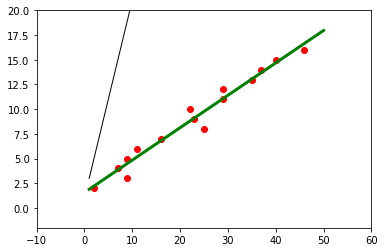

In [2]:
# Data
A = np.array([[2,9,7,9,11,16,25,23,22,29,29,35,37,40,46]]).T
b = np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]).T

plt.axes(xlim = (-10,60), ylim = (-2,20))
plt.plot(A,b,'ro')

#Draw line
reg = LinearRegression().fit(A, b)
x0_main = np.linspace(1,50,1000)
y0_sklearn = reg.coef_[0][0]*x0_main + reg.intercept_
plt.plot(x0_main,y0_sklearn,color='green',linewidth=3)
#Random line GD
x0_gd = np.array([[1],[2]])
y0_gd = x0_main*x0_gd[1][0] + x0_gd[0][0]
plt.plot(x0_main,y0_gd,color = 'black',linewidth = 1)
plt.show()

- Get random [[1],[1]], then using formula GD to adjust it, to minize cost function (use grad of vector  minimize both [0][0] [1][0] and return a list of value)
- Two part of this is iteration and learning rate, depend on small or big learning rate it’ll affect the value of cost (ajust quickly or slowly).
- Mention that type A here is [[1 x]]


In [3]:
from re import X
#Gradient descent
def cost(x):
  m = A.shape[0]
  return 0.5/m * np.linalg.norm(A.dot(x) - b, 2)**2

def grad(x):
  m = A.shape[0]
  return 1/m*A.T.dot(A.dot(x) - b)

def gradient_descent(x0_gd,iteration,learning_rate):
  x_list = [x0_gd]
  for i in range(iteration):
    x_new = x_list[-1] - learning_rate*grad(x_list[-1])
    x_list.append(x_new)
  return x_list

In [4]:
iteration = 90
learning_rate = 0.0001
#add ones to A
A = np.array([[2,9,7,9,11,16,25,23,22,29,29,35,37,40,46]]).T
ones_A = np.ones((A.shape[0],1), dtype = int)
A = np.concatenate((ones_A,A), axis = 1)
x_list = gradient_descent(x0_gd,iteration,learning_rate)

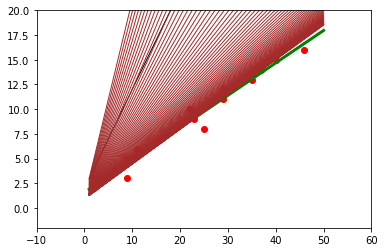

In [5]:
# Data
A = np.array([[2,9,7,9,11,16,25,23,22,29,29,35,37,40,46]]).T
b = np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]).T

plt.axes(xlim = (-10,60), ylim = (-2,20))
plt.plot(A,b,'ro')
# plt.show()

#Draw line
reg = LinearRegression().fit(A, b)
x0_main = np.linspace(1,50,1000)
y0_sklearn = reg.coef_[0][0]*x0_main + reg.intercept_
plt.plot(x0_main,y0_sklearn,color='green',linewidth=3)
# plt.show()

#Random line GD
#As you can see type of A is [[1],[x]] so --> x[0][0] is intercept_ and [1][0] is coefficent_
x0_gd = np.array([[1],[2]])
y0_gd = x0_main*x0_gd[0][0] + x0_gd[1][0]
plt.plot(x0_main,y0_gd,color = 'black',linewidth = 1)
# plt.show()

#Line by gradient descent
for i in range(len(x_list)):
  plt.plot(x0_main,x_list[i][1][0]*x0_main+x_list[i][0][0],color='brown',linewidth=1)

plt.show()

Text(0, 0.5, 'Cost value')

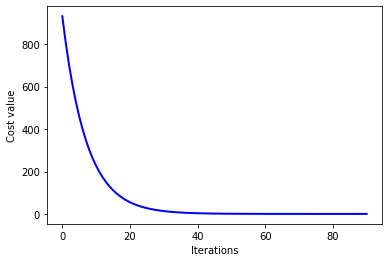

In [6]:
A = np.array([[2,9,7,9,11,16,25,23,22,29,29,35,37,40,46]]).T
ones_A = np.ones((A.shape[0],1), dtype = int)
A = np.concatenate((ones_A,A), axis = 1)

time_gds = []
cost_gds = []
for i in range(len(x_list)):
  time_gds.append(i)
  cost_gds.append(cost(x_list[i]))
plt.plot(time_gds,cost_gds,color = 'blue', linewidth = 2)
plt.xlabel('Iterations')
plt.ylabel('Cost value')

Actually, you can pass  
        # if np.linalg.norm(grad(x_new))/m < 0.5: # when to stop GD  
        #   break  
to exit gradient descent because it don't change so much about the cost maybe <0.2 or <0.5  
Mention that because Grad return a list of vector so here we use np.linalg.norm() to calculate it.

The prototype of that is using derivative, that'll take less energy of computer than linear regression when calculate inverse()  
When we stop this algorithm? Draw graph of costfunction this model, so when it don't change so much --> we can stop here.